Found 1492 images belonging to 2 classes.
Found 23467 images belonging to 2 classes.

--- Data Analysis ---
Shape of data: (1024, 128, 128, 3)
Label distribution: [363 661]
Mean pixel value: 0.4608598053455353
Standard deviation of pixel values: 0.25875338912010193


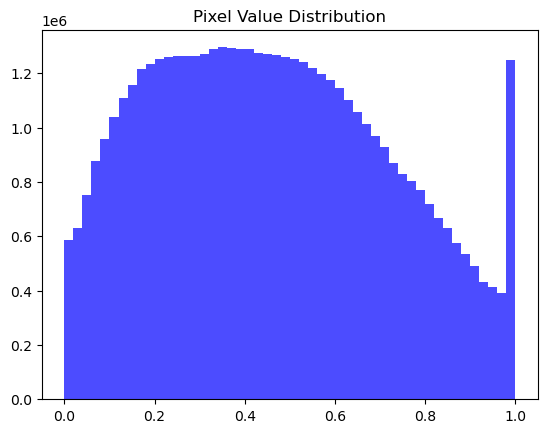

D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6043 - loss: 0.6658

D:\anaconda\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


47/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6048 - loss: 0.6655 - val_accuracy: 0.4904 - val_loss: 0.7062
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6613 - loss: 0.6411 - val_accuracy: 0.4904 - val_loss: 0.7224
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6408 - loss: 0.6393 - val_accuracy: 0.5608 - val_loss: 0.6697
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6862 - loss: 0.6198 - val_accuracy: 0.5130 - val_loss: 0.7512
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6606 - loss: 0.6274 - val_accuracy: 0.5815 - val_loss: 0.6569
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6673 - loss: 0.6016 - val_accuracy: 0.5588 - val_loss: 0.6897
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6441 - loss: 0.6148 - val_accuracy: 0.5718 - val_loss: 0.6601
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6740 - loss: 0.6134 - val_accuracy: 0.5726 - val_loss: 0.6704
Epo

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Config:
    def __init__(self):
        self.train_data_path = "data/train"
        self.test_data_path = "data/test"
        self.batch_size = 32
        self.image_size = (128, 128)
        self.epochs = 10
        self.learning_rate = 0.001
        self.augmentation = {
            "rotation_range": 30,
            "width_shift_range": 0.2,
            "height_shift_range": 0.2,
            "shear_range": 0.2,
            "zoom_range": 0.2,
            "horizontal_flip": True
        }

class DataProcessor:
    def __init__(self, config):
        self.config = config
        self.augmentor = ImageDataGenerator(**config.augmentation, rescale=1./255)

    def load_data(self):
        train_dataset = self.augmentor.flow_from_directory(
            self.config.train_data_path,
            target_size=self.config.image_size,
            batch_size=self.config.batch_size,
            class_mode="binary"
        )
        test_dataset = ImageDataGenerator(rescale=1./255).flow_from_directory(
            self.config.test_data_path,
            target_size=self.config.image_size,
            batch_size=self.config.batch_size,
            class_mode="binary"
        )
        return train_dataset, test_dataset

    def preprocess_raw_images(self, dataset):
        data, labels = [], []
        for batch, label in dataset:
            data.extend(batch)
            labels.extend(label)
            if len(data) >= 1000:  # Process a subset for analysis
                break
        data = np.array(data)
        labels = np.array(labels)
        return data, labels

    def analyze_data(self, data, labels):
        print("\n--- Data Analysis ---")
        print(f"Shape of data: {data.shape}")
        print(f"Label distribution: {np.bincount(labels.astype(int))}")
        print(f"Mean pixel value: {np.mean(data)}")
        print(f"Standard deviation of pixel values: {np.std(data)}")
        plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
        plt.title("Pixel Value Distribution")
        plt.show()

class FeatureEngineer:
    def __init__(self, config):
        self.config = config

    def augment_data(self, data):
        # Data augmentation handled by ImageDataGenerator, no need to augment here
        return data

class ModelTrainer:
    def __init__(self, config):
        self.config = config
        self.model = None

    def build_model(self):
        self.model = Sequential([
            Input(shape=(*self.config.image_size, 3)),  # Input layer with shape
            Conv2D(32, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(self.config.learning_rate),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )

    def train_model(self, train_dataset, test_dataset):
        self.model.fit(
            train_dataset,
            validation_data=test_dataset,
            epochs=self.config.epochs,
        )

    def evaluate_model(self, test_dataset):
        return self.model.evaluate(test_dataset)

    def fine_tune_model(self, train_dataset, test_dataset):
        self.model.layers[-1].trainable = True
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(self.config.learning_rate * 0.1),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )
        self.train_model(train_dataset, test_dataset)

class App:
    def __init__(self):
        self.config = Config()
        self.data_processor = DataProcessor(self.config)
        self.feature_engineer = FeatureEngineer(self.config)
        self.model_trainer = ModelTrainer(self.config)

    def run(self):
        # Load and preprocess data
        train_dataset, test_dataset = self.data_processor.load_data()
        raw_data, raw_labels = self.data_processor.preprocess_raw_images(train_dataset)
        self.data_processor.analyze_data(raw_data, raw_labels)

        # Feature engineering (example: augmentation)
        augmented_data = self.feature_engineer.augment_data(raw_data)  # No need to augment here

        # Build, train, and evaluate model
        self.model_trainer.build_model()
        self.model_trainer.train_model(train_dataset, test_dataset)
        results = self.model_trainer.evaluate_model(test_dataset)
        print(f"Model evaluation results: {results}")

if __name__ == "__main__":
    app = App()
    app.run()